# Electron-Jet $\Delta\varphi$ and Charged Jet Fragmentation Function.
## e+P collisions @20+100 GeV
## $\sqrt{s}=89$ GeV, $L = 10\mathrm{fb}^{-1}$
### Two observables of interest at the EIC

In [1]:
import ROOT
import numpy as np
from ROOT import TGraphErrors
from ROOT import TVectorT
import matplotlib.pyplot as plt
from matplotlib import ticker
from root_np_functions import *
from plotting_functions import *

Welcome to JupyROOT 6.22/06


### 3.0 T and 1.4 T Simulations

In [2]:
filename = "Histograms_Jet_Callibration_3.000000T.root"
filename_14T="Histograms_Jet_Callibration_1.400000T.root"
#filename = "unscaled_Histograms_Jet_Callibration_3.000000T.root" #no E/P cut
#filename_14T="unscaled_Histograms_Jet_Callibration_1.400000T.root"
#filename = "test_Histograms_Jet_Callibration_3.000000T.root"
#filename_14T="test_Histograms_Jet_Callibration_1.400000T.root"
file = ROOT.TFile(filename)
file_14T = ROOT.TFile(filename_14T)

## Luminosity Scaling

In [3]:
#Constants (EIC Luminosity, Pythia Cross Section, N Events)
EIC_Luminosity = 1E10 #10 inverse femtobarn in mililbarn units
E_Jet_Pythia_CrossSection = 9.27E-5 #milibarns
N_Events_1p4Tesla = 2209703 #number of events in 1.4T NTuple
N_Events_3Tesla = 2295430 #number of events in 3.0T NTuple

#Account for cuts in MyJetAnalysis before events are written to NTuple
pre_selection_scale = 1000/993
N_Events_1p4Tesla = N_Events_1p4Tesla*pre_selection_scale
N_Events_3Tesla = N_Events_3Tesla*pre_selection_scale

#Obtain GENERATED Luminosities
Lum_1p4T = N_Events_1p4Tesla/E_Jet_Pythia_CrossSection
Lum_3T = N_Events_3Tesla/E_Jet_Pythia_CrossSection

#Ratio of Luminosities is the SCALE
Scale_1p4T = EIC_Luminosity/Lum_1p4T
Scale_3T = EIC_Luminosity/Lum_3T

print(Scale_3T)

0.4010189811930663


### Electron Jet $\Delta\varphi$

In [4]:
dPhi_bins,dPhi_centers,dPhi_widths = get_th1_binning_np(file,"dPhi_e_TrueJet")
TJ_dPhi, TJ_dPhi_errors = TH1_to_numpy_wErrors(file,"dPhi_e_TrueJet",True,False)
RJ_dPhi, RJ_dPhi_errors = TH1_to_numpy_wErrors(file,"dPhi_e_RecoJet",True,False)

Tesla14_RecodPhi,Tesla14_RecodPhi_errors = TH1_to_numpy_wErrors(file_14T,"dPhi_e_RecoJet",True,False)
Tesla14_TruthdPhi,Tesla14_TruthdPhi_errors = TH1_to_numpy_wErrors(file_14T,"dPhi_e_TrueJet",True,False)

all_TJ_dPhi, all_TJ_dPhi_errors = TH1_to_numpy_wErrors(file,"all_dPhi_e_TrueJet",True,False)

TJ_dPhi = TJ_dPhi/dPhi_widths
TJ_dPhi_errors = TJ_dPhi_errors/dPhi_widths
RJ_dPhi = RJ_dPhi/dPhi_widths
RJ_dPhi_errors = RJ_dPhi_errors/dPhi_widths

Tesla14_RecodPhi = Tesla14_RecodPhi/dPhi_widths
Tesla14_RecodPhi_errors = Tesla14_RecodPhi_errors/dPhi_widths
Tesla14_TruthdPhi = Tesla14_TruthdPhi/dPhi_widths
Tesla14_TruthdPhi_errors = Tesla14_TruthdPhi_errors/dPhi_widths

all_TJ_dPhi = all_TJ_dPhi/dPhi_widths
all_TJ_dPhi_errors = all_TJ_dPhi_errors/dPhi_widths

dPhi_bins,dPhi_centers,dPhi_widths = get_th1_binning_np(file,"dPhi_e_TrueJet")
TJ_dPhi, TJ_dPhi_errors = TH1_to_numpy_wErrors(file,"all_dPhi_e_TrueJet",True,False)
RJ_dPhi, RJ_dPhi_errors = TH1_to_numpy_wErrors(file,"dPhi_e_RecoJet",True,False)

Tesla14_RecodPhi,Tesla14_RecodPhi_errors = TH1_to_numpy_wErrors(file_14T,"dPhi_e_RecoJet",True,False)
Tesla14_TruthdPhi,Tesla14_TruthdPhi_errors = TH1_to_numpy_wErrors(file_14T,"dPhi_e_TrueJet",True,False)

In [5]:
#Errors below are divided by N_Entries()
print(Tesla14_TruthdPhi_errors[0])
#0.0006173946618197305 #No Scaling
#0.00025719229124744   #TH1->Scale() function
0.00095656686147599   #By Hand Scaling (before E/P cut)

0.08416700739253648


0.00095656686147599

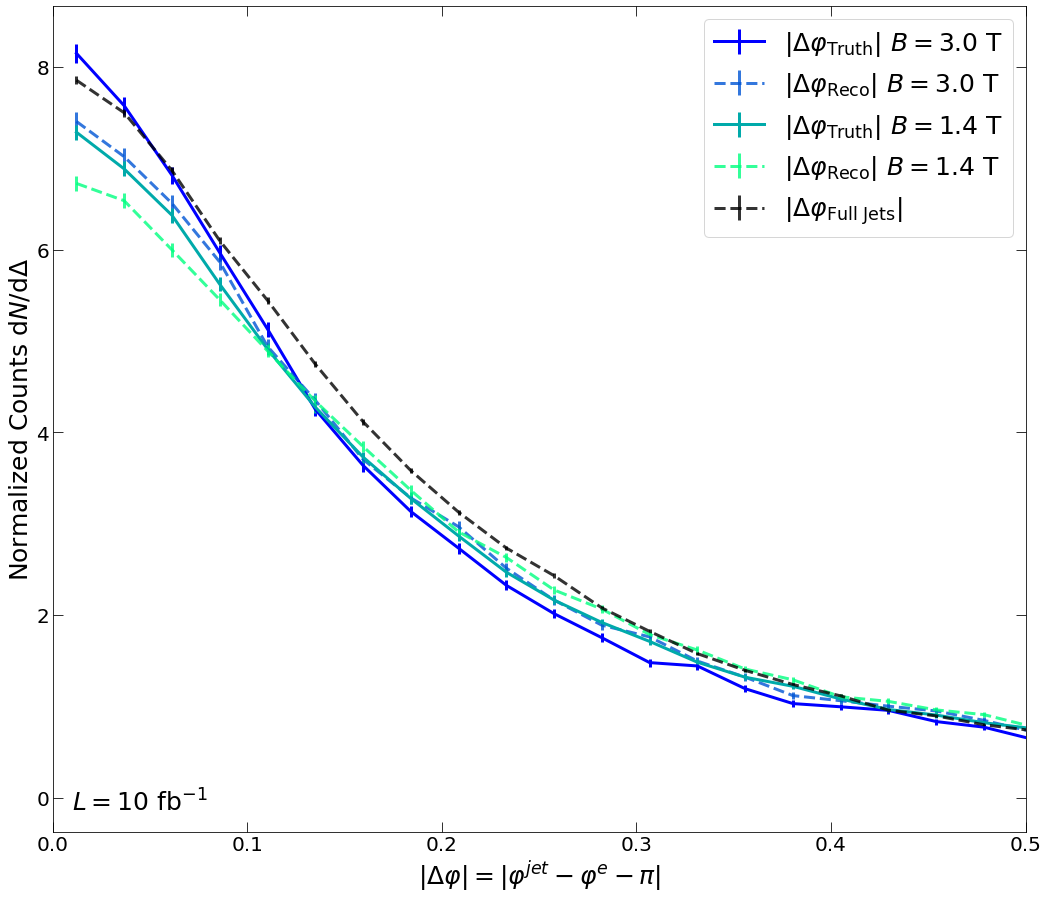

In [6]:
cool = get_colors(plt.cm.winter,4,False)
fig = plt.figure(figsize=(14,12))

#3.0T Field
plt.errorbar(dPhi_centers,TJ_dPhi,yerr=TJ_dPhi_errors,
                         fmt='-',color=cool[0],fillstyle='none',markersize=7,linewidth=3,
                         label=r"$|\Delta\varphi_\mathrm{Truth}|~B = 3.0$ T" )

plt.errorbar(dPhi_centers,RJ_dPhi,yerr=RJ_dPhi_errors,
                         fmt='--',color=cool[1],linewidth=3,alpha=0.8,
                         label=r"$|\Delta\varphi_\mathrm{Reco}|~B = 3.0$ T" )

#1.4T Field
plt.errorbar(dPhi_centers,Tesla14_TruthdPhi,yerr=Tesla14_TruthdPhi_errors,
                         fmt='-',color=cool[2],fillstyle='none',markersize=7,linewidth=3,
                         label=r"$|\Delta\varphi_\mathrm{Truth}|~B = 1.4$ T" )
                         #label=r"$|\varphi_{truth}^{jet} - \varphi^{e}-\pi|$")

plt.errorbar(dPhi_centers,Tesla14_RecodPhi,yerr=Tesla14_RecodPhi_errors,
                         fmt='--',color=cool[3],linewidth=3,alpha=0.8,
                         label=r"$|\Delta\varphi_\mathrm{Reco}|~B = 1.4$ T")
                         #label=r"$|\varphi_{reco}^{jet} - \varphi^{e}-\pi|$")
    
plt.errorbar(dPhi_centers,all_TJ_dPhi,yerr=all_TJ_dPhi_errors,
                         fmt='--',color="k",linewidth=3,alpha=0.8,
                         label=r"$|\Delta\varphi_\mathrm{Full\ Jets}|$")

plt.text(.01,0.1,r'$L = 10\ \mathrm{fb}^{-1}$',ha="left",va="top",size=25,alpha=1.)

plt.tight_layout()
plt.xlim(0,.5)
plt.ylabel("Normalized Counts $\mathrm{d}N/\mathrm{d}\Delta\varphi$",fontsize=25,y=0.5)
plt.xlabel(r"$|\Delta\varphi|=|\varphi^{jet} - \varphi^{e}-\pi|$",fontsize=25,x=0.5)
plt.tick_params(which='both',direction='in',right=True,top=True,bottom=True,length=10,labelsize=20)
plt.legend(fontsize=25,loc='upper right')
plt.savefig("azimuthal_correlations.pdf")

#1/Njets

 ## Charged Jet Fragmentation Function

In [7]:
#3 Tesla
z_bins,z_centers,z_widths = get_th1_binning_np(file,"truth_fragmentation_fuction")
truth_ff, truth_ff_errors = TH1_to_numpy_wErrors(file,"truth_fragmentation_fuction")
reco_ff, reco_ff_errors = TH1_to_numpy_wErrors(file,"fragmentation_fuction")
jet_count_array = TVT_to_numpy(file,"TJet_Counter")
N_jets = jet_count_array[0][1]
print(N_jets)
truth_ff = truth_ff/N_jets/z_widths
truth_ff_errors = truth_ff_errors/N_jets/z_widths
reco_ff = reco_ff/N_jets/z_widths
reco_ff_errors = reco_ff_errors/N_jets/z_widths

62513.0


In [8]:
#1.4 Tesla
z_bins,z_centers,z_widths = get_th1_binning_np(file_14T,"truth_fragmentation_fuction")
truth_14_ff, truth_14_ff_errors = TH1_to_numpy_wErrors(file_14T,"truth_fragmentation_fuction")
reco_14_ff, reco_14_ff_errors = TH1_to_numpy_wErrors(file_14T,"fragmentation_fuction")
jet_count_array = TVT_to_numpy(file_14T,"TJet_Counter")
N_jets = jet_count_array[0][1]
print(N_jets)
truth_14_ff = truth_14_ff/N_jets/z_widths
truth_14_ff_errors = truth_14_ff_errors/N_jets/z_widths
reco_14_ff = reco_14_ff/N_jets/z_widths
reco_14_ff_errors = reco_14_ff_errors/N_jets/z_widths

83795.0


In [9]:
#normalization and bin width scaling (1/N_\mathrm{jets}dN/dz)

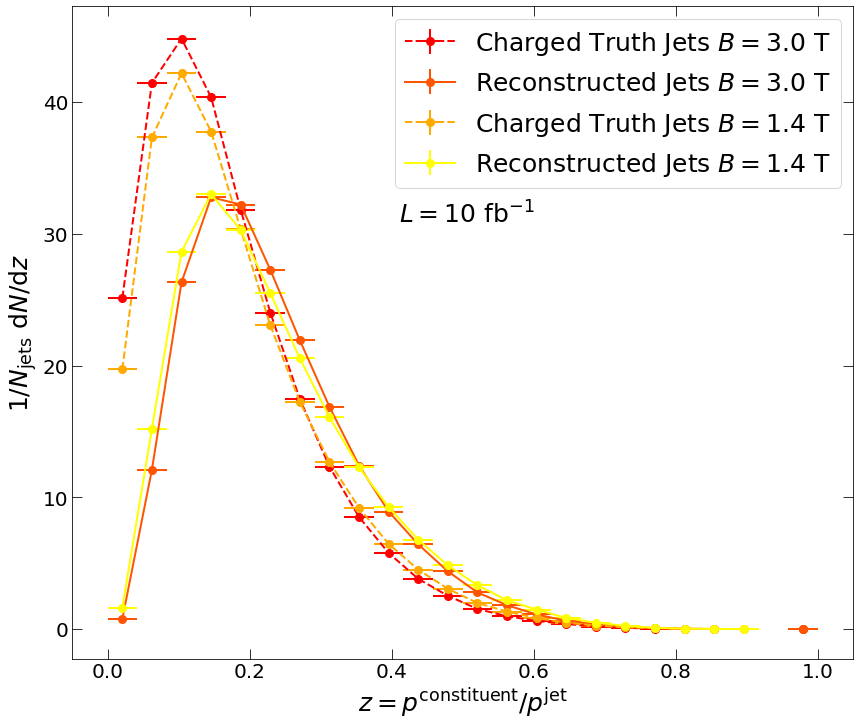

In [10]:
warm = get_colors(plt.cm.autumn,4,False)
fig = plt.figure(figsize=(14,12))
plt.tight_layout()
plt.errorbar(z_centers,truth_ff,xerr=z_widths,yerr=truth_ff_errors,
                         fmt='--o',color=warm[0],markersize=8,linewidth=2,
                         label=r"Charged Truth Jets $B=3.0$ T")
plt.errorbar(z_centers,reco_ff,xerr=z_widths,yerr=reco_ff_errors,
                         fmt='-o',color=warm[1],markersize=8,linewidth=2,
                         label=r"Reconstructed Jets $B=3.0$ T")
plt.errorbar(z_centers,truth_14_ff,xerr=z_widths,yerr=truth_14_ff_errors,
                         fmt='--o',color=warm[2],markersize=8,linewidth=2,
                         label=r"Charged Truth Jets $B=1.4$ T")
plt.errorbar(z_centers,reco_14_ff,xerr=z_widths,yerr=reco_14_ff_errors,
                         fmt='-o',color=warm[3],markersize=8,linewidth=2,
                         label=r"Reconstructed Jets $B=1.4$ T")

plt.text(.41,32.5,r'$L = 10\ \mathrm{fb}^{-1}$',ha="left",va="top",size=25,alpha=1.)

plt.ylabel(r"$1/N_\mathrm{jets} ~ \mathrm{d}N/ \mathrm{d}z$",fontsize=25,y=0.5)
plt.xlabel(r"$z = p^\mathrm{constituent}/p^\mathrm{jet}$",fontsize=25,x=0.5)
plt.tick_params(which='both',direction='in',right=True,top=True,bottom=True,length=10,labelsize=20)
plt.legend(fontsize=25,loc='upper right')
plt.savefig("charged_jet_fragmentation.pdf")

# AllJet DeltaPhi

### dictionary

Histograms_Jet_Callibration_3.000000T.root
6.390504772861017
Histograms_Jet_Callibration_3.000000T.root
6.508432126177382
Histograms_Jet_Callibration_3.000000T.root
6.448546118881522
Histograms_Jet_Callibration_3.000000T.root
7.431418543410604
Histograms_Jet_Callibration_3.000000T.root
7.854035097894017
Histograms_Jet_Callibration_3.000000T.root
8.373594947665358


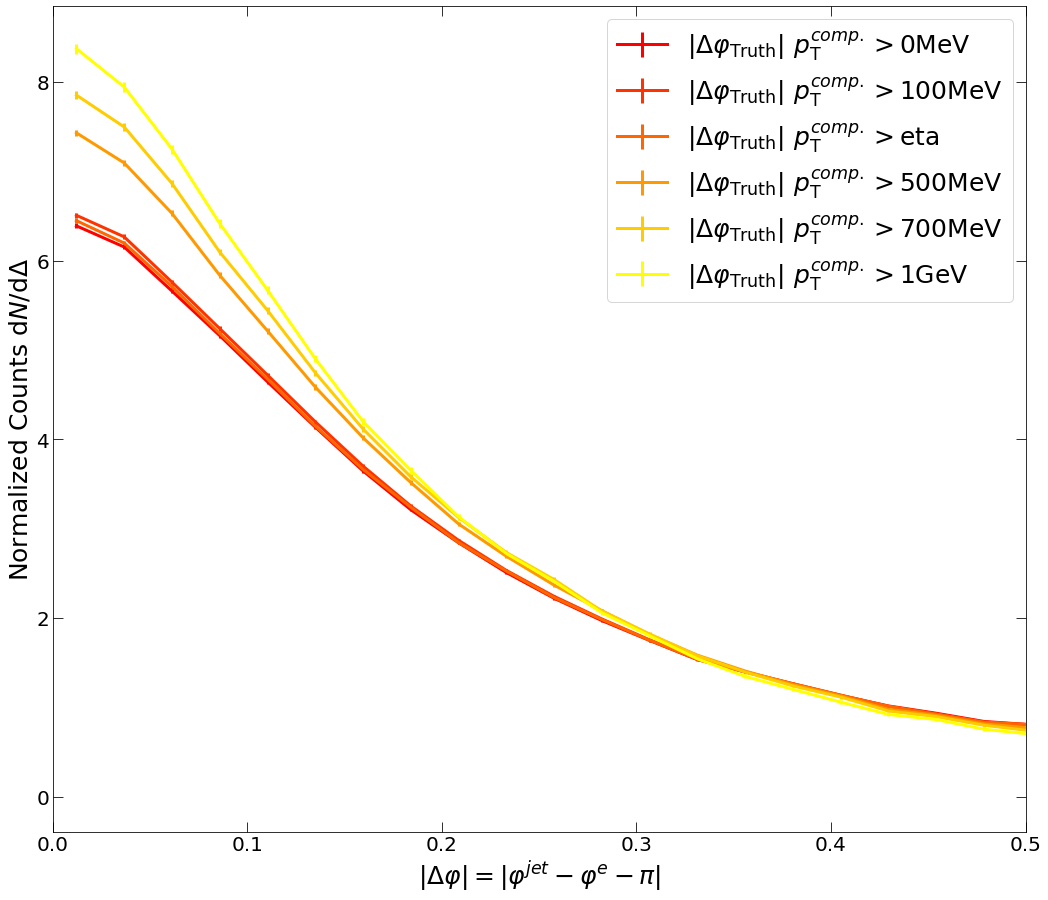

In [11]:
prefixes = ["0MeV","100MeV","eta","500MeV","700MeV","1GeV"]
all_dphi_dir = "all_truth_eDelta_Study_3T/"

tab10 = get_colors(plt.cm.autumn,len(prefixes),False)
fig = plt.figure(figsize=(14,12))
all_dphi_dict = {}

for s in prefixes:
    allT_filename = all_dphi_dir+s+"_Histograms_Jet_Callibration_3.000000T.root"
    allT_file = ROOT.TFile(allT_filename)
    print(filename)
    all_dphi_dict["%s"%(s)],all_dphi_dict["%s_Errors"%(s)] = TH1_to_numpy_wErrors(allT_file,"all_dPhi_e_TrueJet",True,False)
    all_dphi_dict["%s"%(s)]=all_dphi_dict["%s"%(s)]/dPhi_widths
    all_dphi_dict["%s_Errors"%(s)]=all_dphi_dict["%s_Errors"%(s)]/dPhi_widths
    print(all_dphi_dict["%s"%(s)][0])
    
for s,col in zip(prefixes,tab10):
    plt.errorbar(dPhi_centers,all_dphi_dict["%s"%(s)],yerr=all_dphi_dict["%s_Errors"%(s)],
                         fmt='-',color=col,fillstyle='none',markersize=7,linewidth=3,
                         label=r"$|\Delta\varphi_\mathrm{Truth}|\ p_\mathrm{T}^{comp.} >$"+s )
    
plt.tight_layout()
plt.xlim(0,.5)
plt.ylabel("Normalized Counts $\mathrm{d}N/\mathrm{d}\Delta\varphi$",fontsize=25,y=0.5)
plt.xlabel(r"$|\Delta\varphi|=|\varphi^{jet} - \varphi^{e}-\pi|$",fontsize=25,x=0.5)
plt.tick_params(which='both',direction='in',right=True,top=True,bottom=True,length=10,labelsize=20)
plt.legend(fontsize=25,loc='upper right')

np.save(all_dphi_dir,all_dphi_dict)

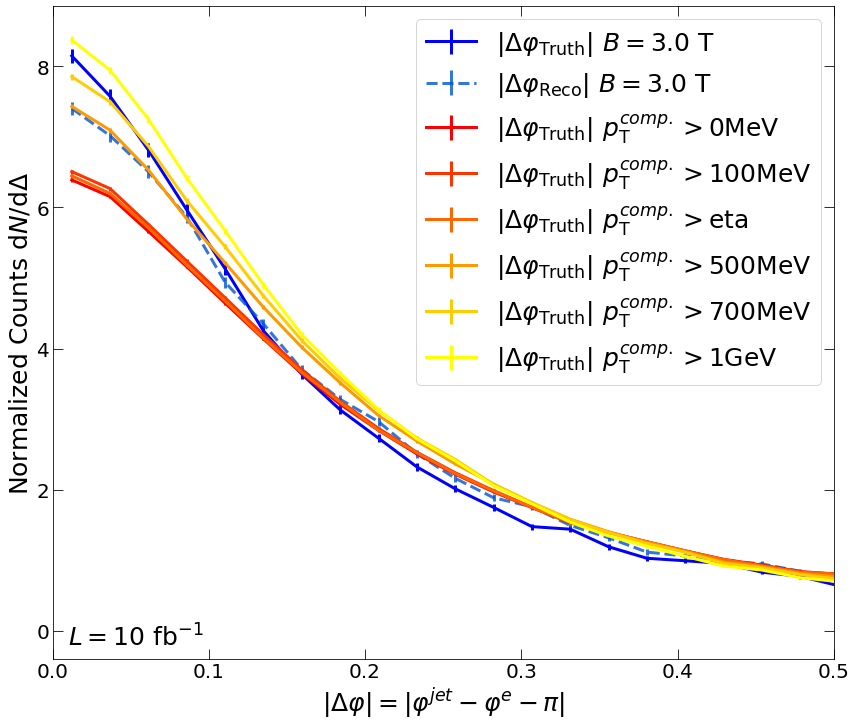

In [12]:
cool = get_colors(plt.cm.winter,4,False)
fig = plt.figure(figsize=(14,12))
plt.tight_layout()
plt.xlim(0,.5)
#3.0T Field
s="700MeV"
plt.errorbar(dPhi_centers,TJ_dPhi,yerr=TJ_dPhi_errors,
                         fmt='-',color=cool[0],fillstyle='none',markersize=7,linewidth=3,
                         label=r"$|\Delta\varphi_\mathrm{Truth}|~B = 3.0$ T" )

plt.errorbar(dPhi_centers,RJ_dPhi,yerr=RJ_dPhi_errors,
                         fmt='--',color=cool[1],linewidth=3,alpha=0.8,
                         label=r"$|\Delta\varphi_\mathrm{Reco}|~B = 3.0$ T" )

#1.4T Field
#plt.errorbar(dPhi_centers,Tesla14_TruthdPhi,yerr=Tesla14_TruthdPhi_errors,
#                         fmt='-',color=cool[2],fillstyle='none',markersize=7,linewidth=3,
#                         label=r"$|\Delta\varphi_\mathrm{Truth}|~B = 1.4$ T" )
                         #label=r"$|\varphi_{truth}^{jet} - \varphi^{e}-\pi|$")

#plt.errorbar(dPhi_centers,Tesla14_RecodPhi,yerr=Tesla14_RecodPhi_errors,
#                         fmt='--',color=cool[3],linewidth=3,alpha=0.8,
#                         label=r"$|\Delta\varphi_\mathrm{Reco}|~B = 1.4$ T")
                         #label=r"$|\varphi_{reco}^{jet} - \varphi^{e}-\pi|$")

for s,col in zip(prefixes,tab10):
    plt.errorbar(dPhi_centers,all_dphi_dict["%s"%(s)],yerr=all_dphi_dict["%s_Errors"%(s)],
                         fmt='-',color=col,fillstyle='none',markersize=7,linewidth=3,
                         label=r"$|\Delta\varphi_\mathrm{Truth}|\ p_\mathrm{T}^{comp.} >$"+s )

plt.text(.01,0.1,r'$L = 10\ \mathrm{fb}^{-1}$',ha="left",va="top",size=25,alpha=1.)

plt.ylabel("Normalized Counts $\mathrm{d}N/\mathrm{d}\Delta\varphi$",fontsize=25,y=0.5)
plt.xlabel(r"$|\Delta\varphi|=|\varphi^{jet} - \varphi^{e}-\pi|$",fontsize=25,x=0.5)
plt.tick_params(which='both',direction='in',right=True,top=True,bottom=True,length=10,labelsize=20)
plt.legend(fontsize=25,loc='upper right')
plt.savefig("azimuthal_correlations.pdf")

# Theory Curves
### From e+A Collisions

22


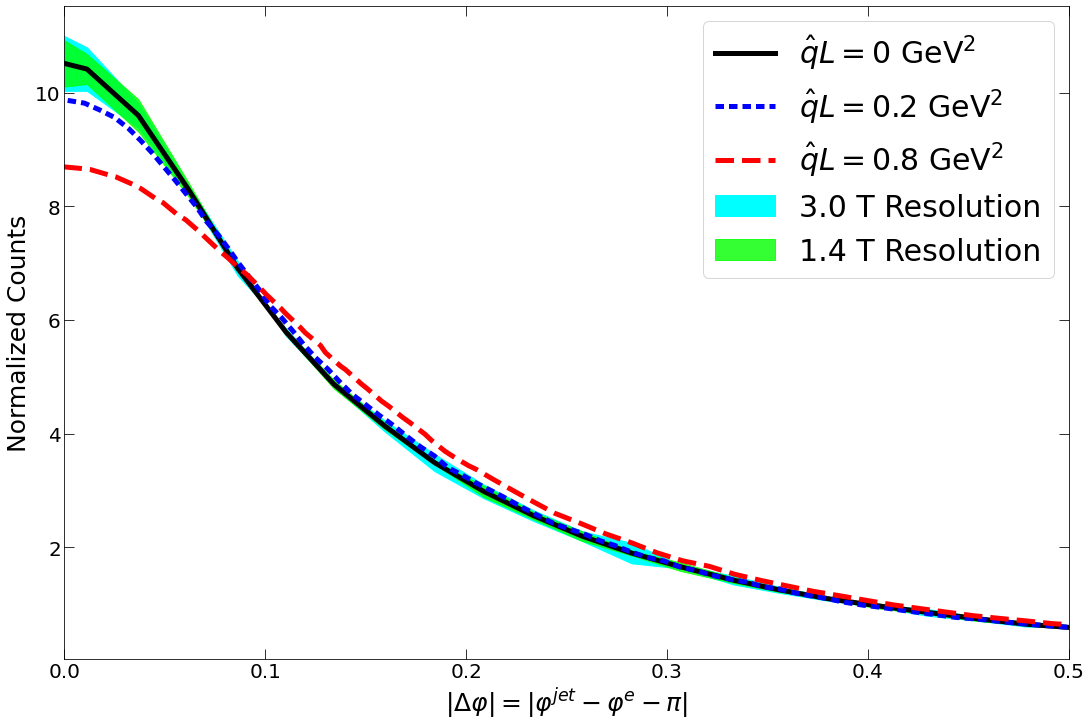

In [13]:
from numpy import genfromtxt
import scipy
from scipy.interpolate import UnivariateSpline
qL0_csv = genfromtxt('qL0.csv', delimiter=',')
qL2_csv = genfromtxt('qL2.csv', delimiter=',')
qL8_csv = genfromtxt('qL8.csv', delimiter=',')
qL0_centers_csv = genfromtxt('qL0_centers.csv', delimiter=',')
#print(qL0_centers_csv)

qL2_x = qL2_csv[:,0]
qL2_y = qL2_csv[:,1]
qL8_x = qL8_csv[:,0]
qL8_y = qL8_csv[:,1]

qL0_x = [1.08695652e-04, 1.12500000e-02, 3.68750000e-02, 6.13858696e-02, 8.62681159e-02,
 1.10407609e-01, 1.34175725e-01, 1.59429348e-01, 1.84311594e-01,
 2.08822464e-01, 2.33333333e-01, 2.57844203e-01, 2.82355072e-01,
 3.06494565e-01, 3.33233696e-01, 3.55887681e-01, 3.80027174e-01,
 4.04909420e-01, 4.29048913e-01, 4.54302536e-01, 4.78813406e-01,
 5.00353261e-01]
qL0_y = [10.51327231, 10.41475973,  9.59851259,  8.31784897,  6.91052632,  5.78466819,  4.86990847,
  4.13810069,  3.49073227,  2.98409611,  2.56189931,  2.19599542,  1.90045767,
  1.66121281,  1.42196796,  1.25308924,  1.09828375,  0.97162471,  0.8590389,
  0.74645309,  0.6479405,   0.5916476]

print(len(qL0_x))
fig = plt.figure(figsize=(18,12))
plt.tight_layout()
plt.plot(qL0_x,qL0_y,'k-',lw=5,label="$\hat{q}L=0\ \mathrm{GeV}^2$")
plt.plot(qL2_x,qL2_y,'b--',linestyle=(0, (1.7, 1)),lw=5,label="$\hat{q}L=0.2\ \mathrm{GeV}^2$")
plt.plot(qL8_x,qL8_y,'r--',lw=5,label="$\hat{q}L=0.8\ \mathrm{GeV}^2$")

#smearing effect 3Tesla
width = (TJ_dPhi-RJ_dPhi)/2
smear = width/TJ_dPhi
smear_plus = qL0_y+qL0_y*smear[:22]
smear_minus = qL0_y-qL0_y*smear[:22]
plt.fill_between(qL0_x,smear_plus,smear_minus,color="cyan",label="3.0 T Resolution")

width_1p4 = (Tesla14_TruthdPhi-Tesla14_RecodPhi)/2
smear_1p4 = width_1p4/Tesla14_TruthdPhi
smear_plus_1p4 = qL0_y+qL0_y*smear_1p4[:22]
smear_minus_1p4 = qL0_y-qL0_y*smear_1p4[:22]
plt.fill_between(qL0_x,smear_plus_1p4,smear_minus_1p4,color="lime",alpha=0.8,label="1.4 T Resolution")

    
plt.legend()

plt.ylabel(r"Normalized Counts",fontsize=25,y=0.5)
plt.xlabel(r"$|\Delta\varphi|=|\varphi^{jet} - \varphi^{e}-\pi|$",fontsize=25,x=0.5)
plt.xlim([0., 0.5])
plt.tick_params(which='both',direction='in',right=True,top=True,bottom=True,length=10,labelsize=20)
plt.legend(fontsize=30,loc='upper right')
plt.savefig("lepton_jet_theory.pdf")

## Get TF1 for qL=0


****************************************
Minimizer is Linear / Migrad
Chi2                      =   0.00751877
NDf                       =           12
p0                        =      10.4935   +/-   0.0243224   
p1                        =      9.58683   +/-   3.99992     
p2                        =     -1307.06   +/-   171.405     
p3                        =      11743.6   +/-   3119.88     
p4                        =     -44544.6   +/-   29868.5     
p5                        =      45068.2   +/-   165174      
p6                        =       219400   +/-   545889      
p7                        =      -838816   +/-   1.06329e+06 
p8                        =  1.14262e+06   +/-   1.12527e+06 
p9                        =      -572656   +/-   498741      


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


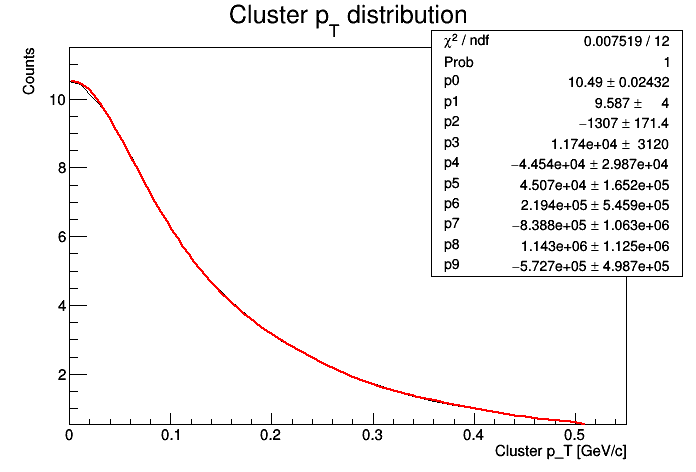

In [90]:
qL0_TG = ROOT.TGraph()
n = len(qL0_x)
for i in range(n):
    x = 0.01*i
    qL0_TG.SetPoint(i, qL0_x[i], qL0_y[i])

func = ROOT.TF1('func','pol9',0,0.5) #Tried gaus, pol1-pol9
fit = qL0_TG.Fit('func','S')

qL0_TG.SetTitle("Cluster p_{T} distribution;Cluster p_T [GeV/c];Counts")
c1 = ROOT.TCanvas("c1")
ROOT.gStyle.SetOptFit(1111);
qL0_TG.Draw()
c1.Draw()

## Smear TF1 by $\sigma_e\oplus\sigma_\mathrm{jet}$

In [104]:
import math
from ROOT import TRandom
from ROOT import gRandom
gRandom.SetSeed(0)
sigma = 0.067076943 #central, as %
sigma_j = 16.427 #mrad
sigma_e = 0.6 #mrad
sigma = math.sqrt(16.426**2+.6**2)/1000
#sigma=0.4
rewrite_root = True
if (rewrite_root):
    toy_file = ROOT.TFile("ToyMC.root","RECREATE")
    ToyMC = ROOT.TH1F('ToyMC',"Toy MC #hat{q}L = 0",500,0,0.5)
    ToyMC_smeared = ROOT.TH1F('smeared_ToyMC','Smeared Toy MC #hat{q}L = 0',500,0,0.5)
    for i in range(0,1000000):
        R = func.GetRandom()
        ToyMC.Fill(R)
        ToyMC_smeared.Fill(gRandom.Gaus(R,sigma))

    ToyMC.Write()
    ToyMC_smeared.Write()
    ToyMC.Delete()
    ToyMC_smeared.Delete()
    toy_file.Close()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


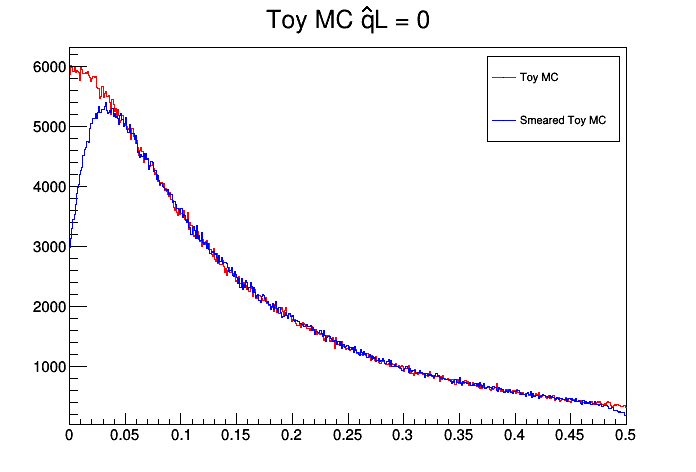

In [105]:
toy_file = ROOT.TFile("ToyMC.root")
ToyMC = toy_file.Get('ToyMC')
ToyMC_smeared = toy_file.Get('smeared_ToyMC')
N = int(ToyMC.GetEntries())
N=10

ROOT.gStyle.SetOptStat(0)
    
c2 = ROOT.TCanvas("c2")
ToyMC.SetLineColor(2)
ToyMC.Draw("same")
ToyMC_smeared.SetLineColor(4)
ToyMC_smeared.Draw("same")

legend = ROOT.TLegend(0.7, 0.7, .89, .88);
legend.AddEntry(ToyMC,"Toy MC")
legend.AddEntry(ToyMC_smeared,"Smeared Toy MC")
legend.Draw("same")
c2.Draw()
#toy_file.Close()

In [ ]:
#smearing effect 3Tesla
strings = ["Central","Forward","Backwards"]

string = "Central"


fig = plt.figure(figsize=(18,12))
plt.tight_layout()
plt.plot(qL0_x,qL0_y,'k-',lw=5,label="$\hat{q}L=0\ \mathrm{GeV}^2$")
plt.plot(qL2_x,qL2_y,'b--',linestyle=(0, (1.7, 1)),lw=5,label="$\hat{q}L=0.2\ \mathrm{GeV}^2$")
plt.plot(qL8_x,qL8_y,'r--',lw=5,label="$\hat{q}L=0.8\ \mathrm{GeV}^2$")

string = "central"
string = "backwards"
string = "forward"
string = "All"

if (string == "central"):
    smear = 0.067076943 #central
    smear_1p4 = 0.064539616 #central
elif (string == "backwards"):
    smear = 0.050580535 #back
    smear_1p4 = 0.056534991 #back
elif (string == "forward"):
    smear = 0.063891543 #forward
    smear_1p4 = 0.063891543 #forward
elif (string == "All"):
    smear = 0.064287342 #All
    smear_1p4 = 0.055042875 #ALL

qL0_y = np.asarray(qL0_y)

smear_plus = qL0_y+qL0_y*smear
smear_minus = qL0_y-qL0_y*smear
plt.fill_between(qL0_x,smear_plus,smear_minus,color="cyan",label="3.0 T Resolution")

smear_plus_1p4 = qL0_y+qL0_y*smear_1p4
smear_minus_1p4 = qL0_y-qL0_y*smear_1p4
plt.fill_between(qL0_x,smear_plus_1p4,smear_minus_1p4,color="orange",alpha=0.7,label="1.4 T Resolution")
    
plt.legend()

plt.ylabel(r"Normalized Counts",fontsize=25,y=0.5)
plt.xlabel(r"$|\Delta\varphi|=|\varphi^{jet} - \varphi^{e}-\pi|$",fontsize=25,x=0.5)
plt.xlim([0., 0.5])
plt.tick_params(which='both',direction='in',right=True,top=True,bottom=True,length=10,labelsize=20)
plt.legend(fontsize=30,loc='upper right')
plt.savefig("resolution_lepton_jet_theory_%s.pdf"%(string))

# Below uses dictionaries for plotting. Better for in-dev stuff that needs to compare to itself later

In [ ]:
#string_selections = ["NoCut_","RecoCut_NoMissing_","RecoConstitCuts_"]
string_selections = [""]
B_Strings =  ["3T","1.4T"]

file = ROOT.TFile("Histograms_Jet_Callibration_1.400000T.root") #startng file for binning

e_jet_dict = {}
e_jet_dict["edges"],e_jet_dict["centers"],e_jet_dict["width"] = get_th1_binning_np(file,"dPhi_e_TrueJet")
for Cut_String in string_selections:
    for B_string in B_Strings:
        filename = "Histograms_Jet_Callibration_1.400000T.root"
        if B_string == "3T":
            filename = "Histograms_Jet_Callibration_3.000000T.root"
        file = ROOT.TFile(filename)
        description_string = Cut_String+B_string
        e_jet_dict["Truth_"+description_string+"_vals"],e_jet_dict["Truth_"+description_string+"_errors"] = TH1_to_numpy_wErrors(file,"dPhi_e_TrueJet",True)
        e_jet_dict["Reco_"+description_string+"_vals"],e_jet_dict["Reco_"+description_string+"_errors"] = TH1_to_numpy_wErrors(file,"dPhi_e_RecoJet",True)

print(e_jet_dict.keys())
#np.save("./np_arrays/%s"%(B_Field)+Cut_String+"momentum",mom_dict)
#np.save("./np_arrays/%s"%(B_Field)+Cut_String+"rapidity",eta_dict)

In [ ]:
#string_selections = ["RecoCut_NoMissing_","RecoConstitCuts_"]
#text_labels = [r'$N_\mathrm{Missed} < 1$',r'No $N_\mathrm{Missed}$ Cut']
string_selections = [""]
text_labels = [r'No $N_\mathrm{Missed}$ Cut']

B_Fields = [3.0,1.4]
B_Strings =  ["3T","1.4T"]
truth_reco = ["Reco","Truth"]
cool = get_colors(plt.cm.winter, len(B_Strings)*len(truth_reco))

for Cut_String,label in zip(string_selections,text_labels):
    fig = plt.figure(figsize=(14,12))
    plt.tight_layout()
    plt.xlim(0,0.5)
    color_index = 3
    for B_string,B in zip(B_Strings, B_Fields):
        for r_t,fmt in zip(truth_reco,["-","--"]):
            key = r_t+"_"+Cut_String+B_string
            print(key)
            plt.errorbar(e_jet_dict["centers"],e_jet_dict[key+"_vals"],yerr=e_jet_dict[key+"_errors"],
                         fmt=fmt,color=cool[color_index],fillstyle='none',markersize=7,linewidth=3,
                         label=r"$|\Delta\varphi_\mathrm{%s}| B = %1.1f$"%(r_t,B))
            #plt.text(0.025,0.0,label,ha="left",va="bottom",size=25,alpha=0.7)
            plt.ylabel("Normalized Counts",fontsize=25,y=0.5)
            plt.xlabel(r"$|\Delta\varphi|=|\varphi^{jet} - \varphi^{e}-\pi|$",fontsize=25,x=0.5)
            plt.tick_params(which='both',direction='in',right=True,top=True,bottom=True,length=10,labelsize=20)
            color_index-=1
    plt.legend(fontsize=25)
    plt.savefig("./%s_azimuthal_correlation_field_overlay.pdf"%(Cut_String))

In [ ]:
#string_selections = ["RecoCut_NoMissing_","RecoConstitCuts_"]
string_selections = [""]
B_Strings =  ["3T","1.4T"]

file = ROOT.TFile("Histograms_Jet_Callibration_1.400000T.root") #startng file for binning

frag_dict = {}
frag_dict["edges"],frag_dict["centers"],frag_dict["width"] = get_th1_binning_np(file,"fragmentation_fuction")
for Cut_String in string_selections:
    for B_string in B_Strings:
        filename = "Histograms_Jet_Callibration_1.400000T.root"
        if B_string == "3T":
            filename = "Histograms_Jet_Callibration_3.000000T.root"
        file = ROOT.TFile(filename)
        description_string = Cut_String+B_string
        frag_dict["Truth_"+description_string+"_vals"],frag_dict["Truth_"+description_string+"_errors"] = TH1_to_numpy_wErrors(file,"truth_fragmentation_fuction",True)
        frag_dict["Reco_"+description_string+"_vals"],frag_dict["Reco_"+description_string+"_errors"] = TH1_to_numpy_wErrors(file,"fragmentation_fuction",True)

In [ ]:
#string_selections = ["RecoCut_NoMissing_","RecoConstitCuts_"]
#text_labels = [r'$N_\mathrm{Missed} < 1$',r'No $N_\mathrm{Missed}$ Cut']
#string_selections = ["RecoConstitCuts_"]
string_selections = [""]
text_labels = [r'No $N_\mathrm{Missed}$ Cut']

B_Fields = [3.0,1.4]
B_Strings =  ["3T","1.4T"]
truth_reco = ["Truth","Reco"]
cool = get_colors(plt.cm.autumn, len(B_Strings)*len(truth_reco))

for Cut_String,label in zip(string_selections,text_labels):
    fig = plt.figure(figsize=(14,12))
    plt.tight_layout()
    plt.xlim(0,1.0)
    color_index = 3
    for B_string,B in zip(B_Strings, B_Fields):
        for r_t,fmt in zip(truth_reco,["--","-"]):
            key = r_t+"_"+Cut_String+B_string
            print(key)
            plt.errorbar(frag_dict["centers"],frag_dict[key+"_vals"],yerr=frag_dict[key+"_errors"],
                         fmt=fmt,color=cool[color_index],fillstyle='none',markersize=7,linewidth=3,
                         label=r"$|\Delta\varphi_\mathrm{%s}| B = %1.1f$"%(r_t,B))
            #plt.text(0.025,0.0,label,ha="left",va="bottom",size=25,alpha=0.7)
            plt.ylabel(r"$1/N_\mathrm{jets} ~ \mathrm{d}N/ \mathrm{d}z$",fontsize=25,y=0.5)
            plt.xlabel(r"$z = p^\mathrm{constituent}/p^\mathrm{jet}$",fontsize=25,x=0.5)
            plt.tick_params(which='both',direction='in',right=True,top=True,bottom=True,length=10,labelsize=20)
            plt.legend(fontsize=25,loc='upper right')

            color_index-=1
    plt.legend(fontsize=25)
    plt.savefig("./%s_fragmentation_function_field_overlay.pdf"%(Cut_String))